In [1]:
import numpy as np
import matplotlib as mpl
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.optimizers import Adam
print(tf.__version__)

2.2.0


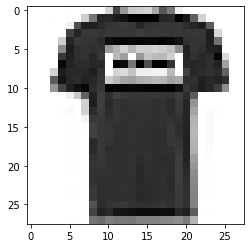

0
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
def show_signal_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
show_signal_image(x_train[1])
print(y_train[1])
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))    
        model.add(Conv2D(64, (5, 5), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        return model
    pass
model = LeNet.build(input_shape=(28,28,1), classes=10)
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model_log = model.fit(x_train, y_train,
          batch_size=128,
          epochs=40,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
469/469 [==============================] - 48s 103ms/step - loss: 0.2318 - accuracy: 0.9133 - val_loss: 0.2425 - val_accuracy: 0.9126
Epoch 2/40
469/469 [==============================] - 40s 86ms/step - loss: 0.1674 - accuracy: 0.9372 - val_loss: 0.2443 - val_accuracy: 0.9150
Epoch 3/40
469/469 [==============================] - 44s 93ms/step - loss: 0.1328 - accuracy: 0.9506 - val_loss: 0.2402 - val_accuracy: 0.9193
Epoch 4/40
469/469 [==============================] - 47s 100ms/step - loss: 0.1074 - accuracy: 0.9601 - val_loss: 0.2542 - val_accuracy: 0.9211
Epoch 5/40
469/469 [==============================] - 47s 99ms/step - loss: 0.0877 - accuracy: 0.9678 - val_loss: 0.2582 - val_accuracy: 0.9212
Epoch 6/40
469/469 [==============================] - 46s 98ms/step - loss: 0.0726 - accuracy: 0.9735 - val_loss: 0.2720 - val_accuracy: 0.9226
Epoch 7/40
469/469 [==============================] - 46s 98ms/step - loss: 0.0618 - accuracy: 0.9772 - val_loss: 0.2946 - val_accurac

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        epochs=40,
                        verbose=1,
                        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
469/469 [==============================] - 50s 108ms/step - loss: 0.6485 - accuracy: 0.7769 - val_loss: 0.3616 - val_accuracy: 0.8779
Epoch 2/40
469/469 [==============================] - 50s 106ms/step - loss: 0.4817 - accuracy: 0.8218 - val_loss: 0.3809 - val_accuracy: 0.8738
Epoch 3/40
469/469 [==============================] - 50s 107ms/step - loss: 0.4476 - accuracy: 0.8347 - val_loss: 0.3476 - val_accuracy: 0.8824
Epoch 4/40
469/469 [==============================] - 57s 122ms/step - loss: 0.4398 - accuracy: 0.8379 - val_loss: 0.3598 - val_accuracy: 0.8751
Epoch 5/40
469/469 [==============================] - 48s 103ms/step - loss: 0.4199 - accuracy: 0.8439 - val_loss: 0.3467 - val_accuracy: 0.8795
Epoch 6/40
469/469 [==============================] - 44s 94ms/step - loss: 0.4140 - accuracy: 0.8474 - val_loss: 0.3466 - val_accuracy: 0.8806
Epoch 7/40
469/469 [==============================] - 44s 93ms/step - loss: 0.4095 - accuracy: 0.8481 - val_loss: 0.3713 - val_accu